# Clustering Analysis

## 1. Problem Definition
In a statement,
> Given the dataset perform clustering analysis or customer segmentation. Create a Report of your approach and explain the different segments or clusters you have business wise.

## 2. Data
The data to be used for these questions can be found here: https://drive.google.com/file/d/1v2iD-74K1g286eejy0jrqbpkV9UuUoXQ/view


## 3. Features
Here, we get to see different information about each of the features in the data. It was given in the assessment.

**Create data dictionary**

1. User_id - ID of a customer or user 
2. Channel - Channel used for last transaction by the customer 
3. TotalTransactionAmount - Total amount transacted by the customer in the last few months 
4. Tx_Count - Count of transactions done by the customer on the system 
5. DaysSinceLastTrans - Number of days since the customer did his last transaction with reference to a specific date 
6. Reseller_id - Id of the reseller that the customer belongs to.
7. Superdealer_id - ID of the SuperDealer that the customer belongs to. 
8. Product_ServiceProvider - Service Provider of the Last Product purchased by the customer. 
9. Product_Type - The Product type of the last product purchased by the customer 
10. Product_Category - Category for the last Product purchased by the Customer.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
assessment = pd.read_csv("assessment.csv")
assessment.head()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [3]:
assessment.shape

(2635, 10)

In [4]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2635 non-null   int64  
 1   Channel                  2633 non-null   float64
 2   TotalTransactionAmount   2635 non-null   int64  
 3   Tx_Count                 2635 non-null   int64  
 4   DaysSinceLastTrans       2635 non-null   int64  
 5   reseller_id              2633 non-null   float64
 6   superdealer_id           2633 non-null   float64
 7   Product_ServiceProvider  2456 non-null   object 
 8   Product_Type             2456 non-null   object 
 9   Product_Category         2456 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 206.0+ KB


In [5]:
assessment.isnull().sum().sort_values(ascending=False)

Product_ServiceProvider    179
Product_Type               179
Product_Category           179
Channel                      2
reseller_id                  2
superdealer_id               2
user_id                      0
TotalTransactionAmount       0
Tx_Count                     0
DaysSinceLastTrans           0
dtype: int64

In [6]:
assessment['reseller_id'].value_counts() 

0.0       2392
1130.0     151
1802.0      30
553.0       19
2557.0      15
56.0        11
464.0        9
910.0        3
2379.0       2
841.0        1
Name: reseller_id, dtype: int64

In [7]:
assessment['Channel'].value_counts() 

1.0     1890
2.0      526
8.0      102
10.0      42
5.0       33
6.0       28
4.0        6
3.0        5
7.0        1
Name: Channel, dtype: int64

In [8]:
assessment['superdealer_id'].value_counts()

447.0     1513
501.0      411
18.0       360
0.0        122
741.0       61
86.0        40
417.0       30
172.0       26
2494.0      19
40.0        16
430.0       14
1642.0       8
56.0         6
384.0        5
466.0        1
2379.0       1
Name: superdealer_id, dtype: int64

In [9]:
# Imputing missing values with median

assessment.loc[(assessment['Channel'].isnull() == True), 'Channel'] = assessment['Channel'].median()
assessment.loc[(assessment['reseller_id'].isnull() == True), 'reseller_id'] = assessment['reseller_id'].median()
assessment.loc[(assessment['superdealer_id'].isnull() == True), 'superdealer_id'] = assessment['superdealer_id'].median()

In [10]:
assessment['reseller_id'].value_counts() 

0.0       2394
1130.0     151
1802.0      30
553.0       19
2557.0      15
56.0        11
464.0        9
910.0        3
2379.0       2
841.0        1
Name: reseller_id, dtype: int64

In [11]:
assessment['superdealer_id'].value_counts()

447.0     1515
501.0      411
18.0       360
0.0        122
741.0       61
86.0        40
417.0       30
172.0       26
2494.0      19
40.0        16
430.0       14
1642.0       8
56.0         6
384.0        5
466.0        1
2379.0       1
Name: superdealer_id, dtype: int64

In [12]:
assessment['Product_Category'].value_counts() 

Telco            2276
Electricity        99
Education          42
Cable TV           25
Universal Pin      14
Name: Product_Category, dtype: int64

In [13]:
assessment['Product_ServiceProvider'].value_counts() 

MTN                      813
Airtel                   700
Glo                      422
9mobile                  355
Jamb                      42
Eko Electric              33
Jos Electric              32
Ikeja Electric            18
DSTV                      13
Ibadan Electric           13
GOTV                      10
Portharcourt Electric      3
Startimes                  2
Name: Product_ServiceProvider, dtype: int64

In [14]:
assessment['Product_Type'].value_counts() 

Airtime        1878
Data            398
Prepaid          71
E-facility       42
Postpaid         28
Pay TV           25
Voucher Pin      14
Name: Product_Type, dtype: int64

In [15]:
assessment["Product_ServiceProvider"].fillna("missing", inplace = True)
assessment["Product_Category"].fillna("missing", inplace = True)
assessment["Product_Type"].fillna("missing", inplace = True)

In [16]:
assessment.isnull().sum().sort_values(ascending=False)

user_id                    0
Channel                    0
TotalTransactionAmount     0
Tx_Count                   0
DaysSinceLastTrans         0
reseller_id                0
superdealer_id             0
Product_ServiceProvider    0
Product_Type               0
Product_Category           0
dtype: int64

In [17]:
assessment.describe()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id
count,2635.000000,2635.000000,2.635000e+03,2635.000000,2635.000000,2635.000000,2635.000000
mean,1251.568880,1.730171,5.815019e+04,91.971157,119.154459,108.794307,389.943833
std,664.557929,1.833953,5.766734e+05,1223.775908,84.336623,379.528720,271.454742
min,3.000000,1.000000,1.000000e+00,1.000000,30.000000,0.000000,0.000000
25%,816.000000,1.000000,2.000000e+02,1.000000,54.000000,0.000000,447.000000
50%,1140.000000,1.000000,1.000000e+03,3.000000,107.000000,0.000000,447.000000
75%,1613.500000,2.000000,4.952000e+03,9.000000,147.000000,0.000000,447.000000
max,2725.000000,10.000000,2.086921e+07,46531.000000,735.000000,2557.000000,2494.000000


In [18]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2635 non-null   int64  
 1   Channel                  2635 non-null   float64
 2   TotalTransactionAmount   2635 non-null   int64  
 3   Tx_Count                 2635 non-null   int64  
 4   DaysSinceLastTrans       2635 non-null   int64  
 5   reseller_id              2635 non-null   float64
 6   superdealer_id           2635 non-null   float64
 7   Product_ServiceProvider  2635 non-null   object 
 8   Product_Type             2635 non-null   object 
 9   Product_Category         2635 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 206.0+ KB


In [19]:
assessment = assessment.drop(columns=['user_id'])

In [20]:
df = assessment.copy()

In [21]:
df.head()

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [22]:
# Turn categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Channel                  2635 non-null   float64
 1   TotalTransactionAmount   2635 non-null   int64  
 2   Tx_Count                 2635 non-null   int64  
 3   DaysSinceLastTrans       2635 non-null   int64  
 4   reseller_id              2635 non-null   float64
 5   superdealer_id           2635 non-null   float64
 6   Product_ServiceProvider  2635 non-null   int8   
 7   Product_Type             2635 non-null   int8   
 8   Product_Category         2635 non-null   int8   
dtypes: float64(3), int64(3), int8(3)
memory usage: 131.4 KB


In [24]:
# Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance).
for i in df.columns:
    df.loc[:, i] = StandardScaler().fit_transform(np.array(df[[i]]))

## Modeling clusters

### Clustering using K-Prototypes

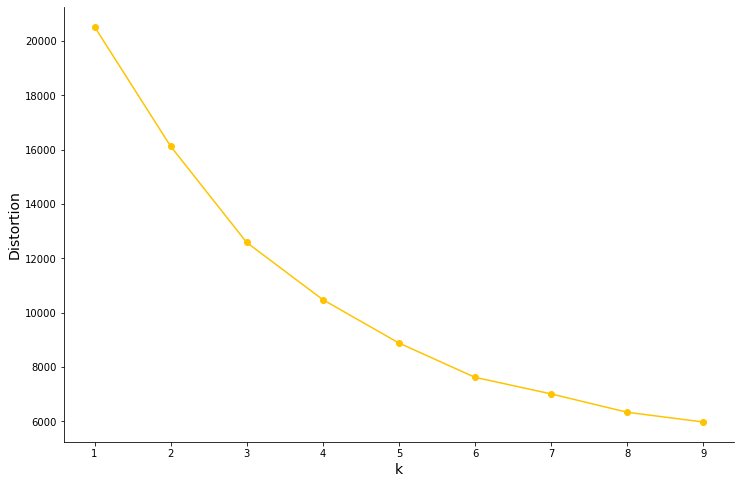

In [25]:
from kmodes.kprototypes import KPrototypes

# Choosing optimal K
cost = []
for k in range(1,10):
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(df, categorical=[1,2])
    cost.append(kproto.cost_)

fig, ax = plt.subplots(figsize =(12, 8))

plt.plot(range(1,10), cost, 'bo-', color = '#FFC300')
plt.xlabel('k', size = 14)
plt.ylabel('Distortion', size = 14)
plt.tick_params(axis='x')
plt.tick_params(axis='y')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

We use the *Elbow Method* to determine the optimal number of clusters to use. In our case, we'll choose **4 clusters**.

In [26]:
# Clustering
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(df, categorical=[1,2])

In [27]:
# Merging original data with clusters
df_clusters = pd.concat([assessment, pd.DataFrame({'cluster': clusters})], axis=1)

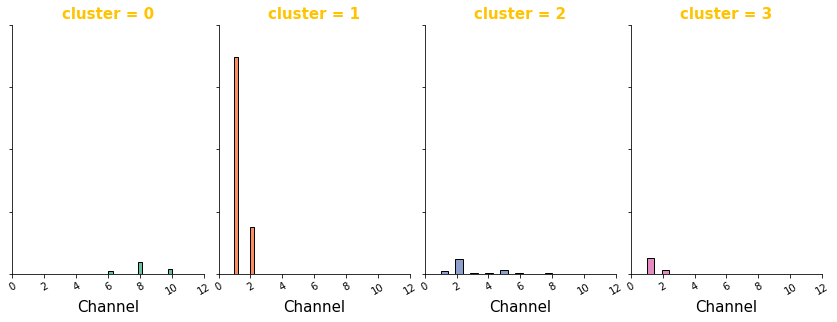

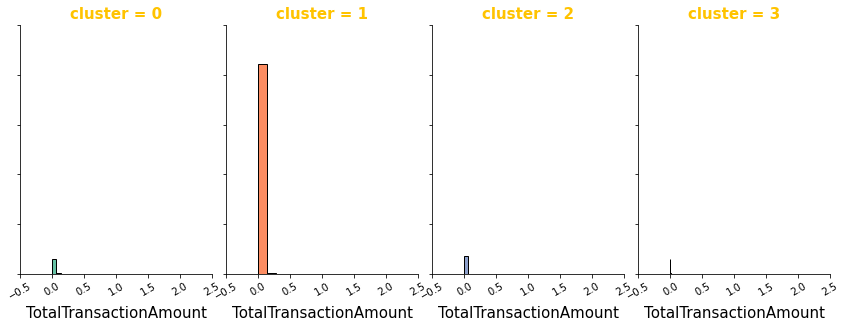

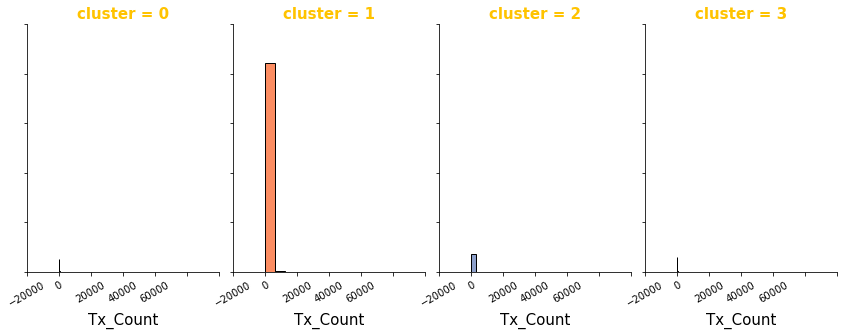

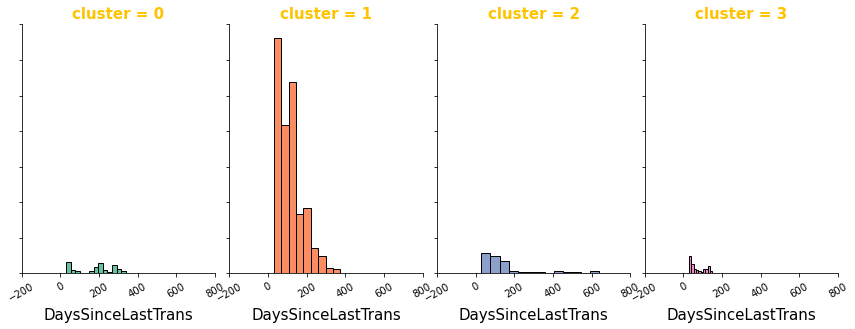

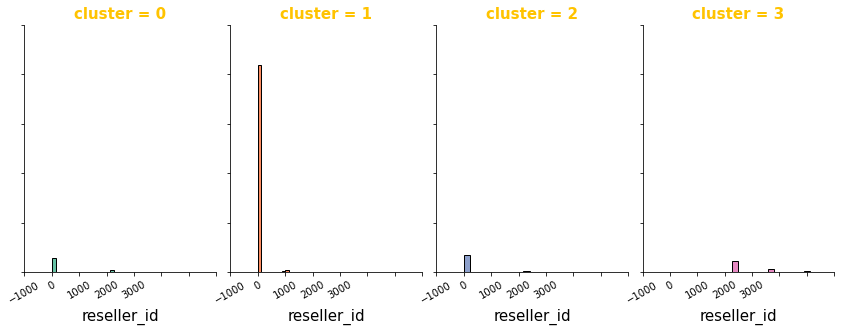

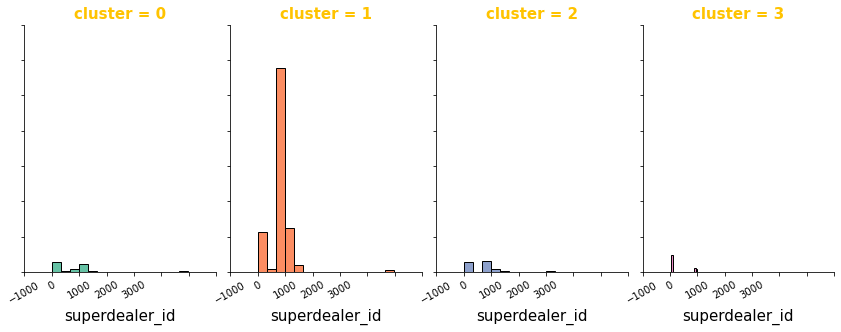

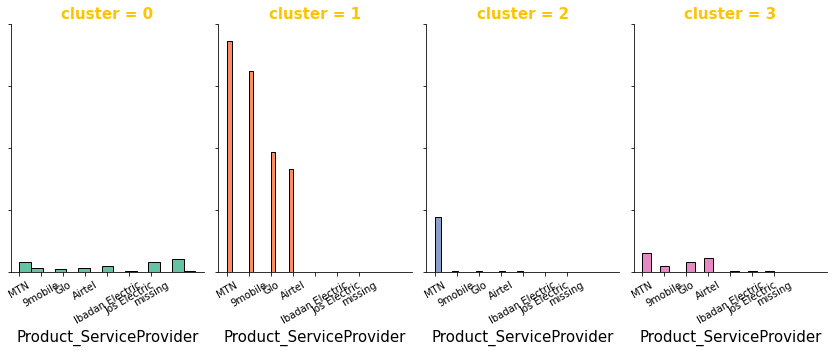

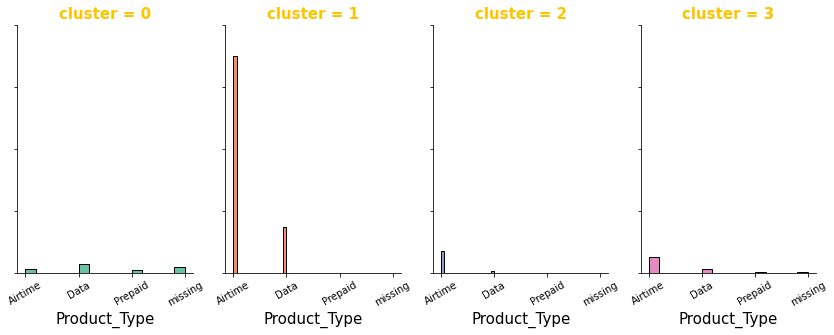

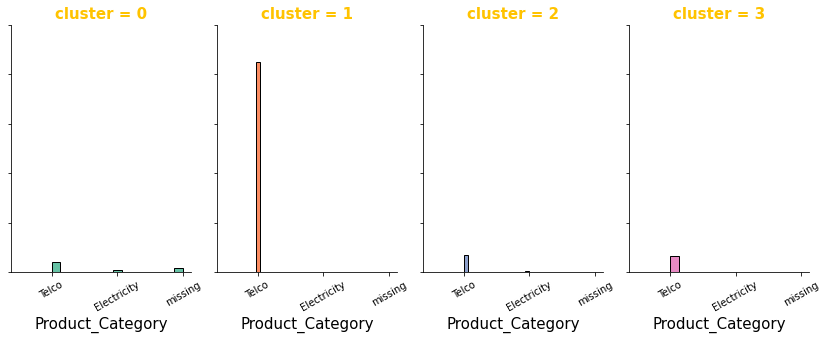

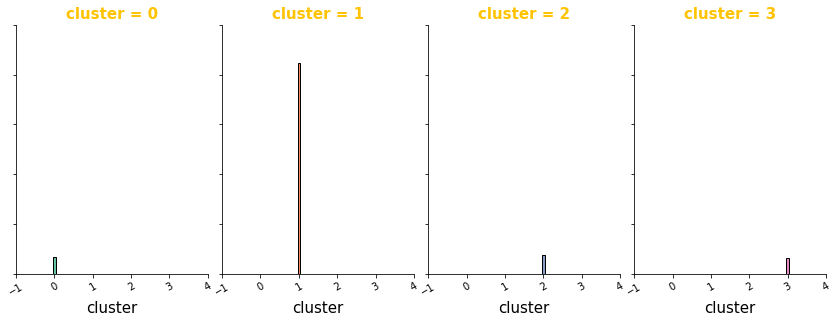

In [37]:
# Clusters interpretation
for i in df_clusters:
    g = sns.FacetGrid(df_clusters, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=15, ec="k") 
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.set_xlabels(size=15)
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

* **Cluster 0:** Customers here mainly use Channel 8 and a little bit of channel 6&10. They don't spend much as compared to those in Cluster 1, they have little transaction count and purchase product from reseller within the ID no 0-464 while a little use reseller with the ID 2379. They purchase product across all service providers which majority use for Data

* **Cluster 1:** Customers here mainly use Channel 1 and some use channel 2, hearvy spenders as their TotalTransactionAmount is on the high side. They have high transaction count and are active customers. They purchase goods and product mainly from reseller within the ID no 0&56  while a few uses reseller with the ID 1130. They purchase product mainly from MTN, 9Mobile, Glo and Airtel which majority use for Airtime while some use it for Data

* **Cluster 2:** Customers here mainly use Channel 2 and a little bit of channel 1,3,4,5,6,8. They don't spend much as compared to those in Cluster 1, they have fair bit of transaction count and purchase product from reseller within the ID no 0-553 while a few use reseller with the ID 2557. They purchase product mainly from MTN and few purchase from 9Mobile, Glo and Airtel which majority use for Airtime while some use it for Data

* **Cluster 3:** Customers here mainly use Channel 1 and some use channel 2, they spend little. They have little transaction count, and purchase product from reseller within the ID no 2379-2557. They purchase product mainly from MTN, 9Mobile, Glo and Airtel which majority use for Airtime while some use it for Data

In [38]:
assessment['Product_ServiceProvider'].value_counts() 

MTN                      813
Airtel                   700
Glo                      422
9mobile                  355
missing                  179
Jamb                      42
Eko Electric              33
Jos Electric              32
Ikeja Electric            18
DSTV                      13
Ibadan Electric           13
GOTV                      10
Portharcourt Electric      3
Startimes                  2
Name: Product_ServiceProvider, dtype: int64